### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('/home/gondor/DevEnvironment/Python/AluraCursos/SevenDaysOfCode/ProjetoEmprestimoBiblioteca/Datasets/df_final.csv')
df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
1,749227,2006017618,2010/04/19 17:35:25.987000000,2010/04/05 11:25:57.627000000,2010/04/27 11:37:02.530000000,2.011105e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
2,1175444,2006017618,2012/03/11 17:05:30.982000000,2012/02/24 16:18:40.959000000,2012/03/28 14:32:13.000000000,2.010057e+09,ALUNO DE GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
3,1209694,2006017618,2012/04/11 12:34:59.458000000,2012/03/28 14:33:04.249000000,2012/04/25 11:48:28.000000000,2.010057e+09,ALUNO DE GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
4,1374962,2006017618,2012/12/12 07:40:40.406000000,2012/11/14 12:41:25.081000000,2013/01/15 17:10:17.000000000,2.011104e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906412 entries, 0 to 906411
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_emprestimo         906412 non-null  int64  
 1   codigo_barras         906412 non-null  object 
 2   data_renovacao        906412 non-null  object 
 3   data_emprestimo       906412 non-null  object 
 4   data_devolucao        906412 non-null  object 
 5   matricula_ou_siape    906412 non-null  float64
 6   tipo_vinculo_usuario  906412 non-null  object 
 7   id_exemplar           906412 non-null  int64  
 8   colecao               906412 non-null  object 
 9   biblioteca            906412 non-null  object 
 10  status_material       906412 non-null  object 
 11  localizacao           906412 non-null  int64  
 12  CDU                   906412 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 89.9+ MB


### Consideração para análises:

- #### A coluna 'id_emprestimo' é uma chave primária, o que significa que os valores precisam ser únicos.

#### Verificando duplicatas na coluna id_emprestimo

In [9]:
df[['id_emprestimo']].value_counts()

id_emprestimo
2468107          4
2467454          4
2364336          4
2352486          4
2372626          4
                ..
1434778          1
1434779          1
1434780          1
1434788          1
1434742          1
Name: count, Length: 855756, dtype: int64

In [12]:
df.drop_duplicates(subset = ['id_emprestimo'],inplace=True)

In [15]:
df[['id_emprestimo']].value_counts()

id_emprestimo
2989064          1
709686           1
709687           1
709688           1
709689           1
                ..
709717           1
709720           1
709721           1
709722           1
709730           1
Name: count, Length: 855756, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 855756 entries, 0 to 906411
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_emprestimo         855756 non-null  int64  
 1   codigo_barras         855756 non-null  object 
 2   data_renovacao        855756 non-null  object 
 3   data_emprestimo       855756 non-null  object 
 4   data_devolucao        855756 non-null  object 
 5   matricula_ou_siape    855756 non-null  float64
 6   tipo_vinculo_usuario  855756 non-null  object 
 7   id_exemplar           855756 non-null  int64  
 8   colecao               855756 non-null  object 
 9   biblioteca            855756 non-null  object 
 10  status_material       855756 non-null  object 
 11  localizacao           855756 non-null  int64  
 12  CDU                   855756 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 91.4+ MB


### **Q1**. Verificar qual é a quantidade total de exemplares emprestados por cada ano e plote um gráfico de linhas.

#### Inicialmente, é necessário converter a coluna data_emprestimo para datetime

In [16]:
df.data_emprestimo = pd.to_datetime(df.data_emprestimo)

In [17]:
quantidade_exemplares = df.iloc[:, [3, 7]]
quantidade_exemplares.head()

,data_emprestimo,id_exemplar
0,2010-01-04 08:08:44.081,195347
1,2010-04-05 11:25:57.627,195347
2,2012-02-24 16:18:40.959,195347
3,2012-03-28 14:33:04.249,195347
4,2012-11-14 12:41:25.081,195347


In [ ]:
quantidade_exemplares.loc[:, 'data_emprestimo'] = quantidade_exemplares.loc[:, 'data_emprestimo'].dt.date

In [18]:
quantidade_exemplares.loc[:, 'data_emprestimo'] = quantidade_exemplares.loc[:, 'data_emprestimo'].dt.year

In [19]:
quantidade_exemplares_por_ano = quantidade_exemplares.value_counts().groupby('data_emprestimo').sum().to_frame('quantidade')
quantidade_exemplares_por_ano

,quantidade
data_emprestimo,
2010,71277
2011,93680
2012,103832
2013,105291
2014,94013
2015,85249
2016,94696
2017,44768
2018,81628


In [21]:
anos = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

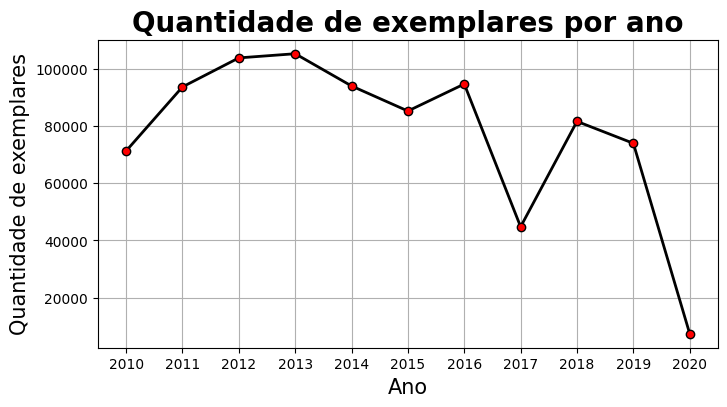

In [22]:
fig = plt.figure(figsize=(8, 4))
plt.plot(quantidade_exemplares_por_ano, color = 'k', linewidth = 2, marker = 'o', markersize = 6, markerfacecolor = 'r')
plt.title('Quantidade de exemplares por ano', fontsize = 20, fontweight = 'bold')
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Quantidade de exemplares', fontsize = 15)
plt.xticks(ticks = anos)
plt.grid(True)
plt.show()

In [23]:
quantidade_exemplares_por_ano.mean()

quantidade    77796.0
dtype: float64

In [36]:
quantidade_exemplares_por_ano

,quantidade
data_emprestimo,
2010,71277
2011,93680
2012,103832
2013,105291
2014,94013
2015,85249
2016,94696
2017,44768
2018,81628


In [41]:
quantidade_exemplares_por_ano.iloc[0:10].mean()

quantidade    84839.0
dtype: float64

### **Q2**. Fazer uma análise em relação à visualização gerada. Atente-se para a quantidade de exemplares emprestados, e não de empréstimos realizados.

Resposta: A analise registra a quantidade de exemplares entre 2010 e 2020, com a quantidade maxima de exemplares emprestados no ano de 2013 contando 105291 exemplares. 
Com a pandemia da covid em 2020, a quantidade de exemplares emprestados caiu para 7366. Excluindo o ano de 2020, a media geral se encontra em 84839 exemplares emprestados por ano. Contando 2020, a media cai para 77796 exemplares emprestados por ano.

### **Q3**. Gerar uma tabela com a quantidade total de exemplares emprestados por mês e descubra quais meses são os que possuem a maior quantidade de empréstimos realizados. Plote um gráfico de linhas.

In [42]:
quantidade_exemplares_por_mes = df.iloc[:, [3, 7]]
quantidade_exemplares_por_mes.head()

,data_emprestimo,id_exemplar
0,2010-01-04 08:08:44.081,195347
1,2010-04-05 11:25:57.627,195347
2,2012-02-24 16:18:40.959,195347
3,2012-03-28 14:33:04.249,195347
4,2012-11-14 12:41:25.081,195347


In [43]:
quantidade_exemplares_por_mes.data_emprestimo = quantidade_exemplares_por_mes.data_emprestimo.dt.month_name()

/tmp/ipykernel_992/1139068672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantidade_exemplares_por_mes.data_emprestimo = quantidade_exemplares_por_mes.data_emprestimo.dt.month_name()


In [44]:
quantidade_por_mes_df = quantidade_exemplares_por_mes.value_counts().groupby('data_emprestimo').sum().sort_values(ascending = False).to_frame('Quantidade')

In [45]:
quantidade_exemplares_por_mes.value_counts().groupby('data_emprestimo').sum()

data_emprestimo
April         82967
August       110903
December      27146
February      98498
January       33423
July          64386
June          39106
March         96455
May           71980
November      56367
October       81656
September     92869
Name: count, dtype: int64

In [46]:
meses = []
for i in quantidade_por_mes_df.index:
    meses.append(i)

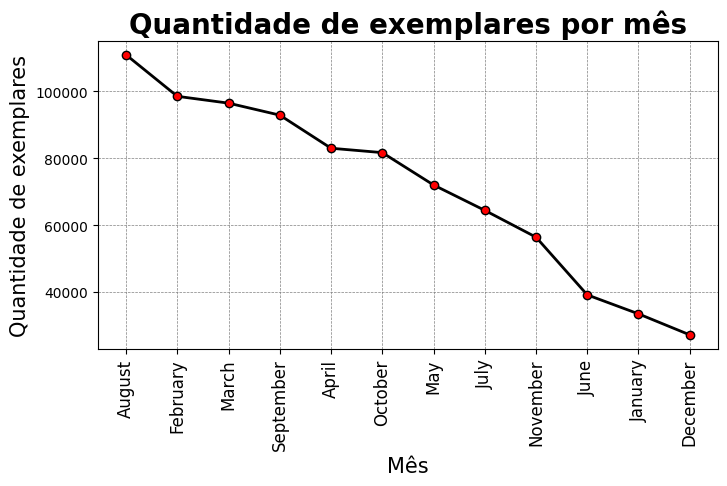

In [47]:
fig = plt.figure(figsize=(8, 4))
plt.plot(quantidade_por_mes_df, color = 'k', linewidth = 2, marker = 'o', markersize = 6, markerfacecolor = 'r')
plt.title('Quantidade de exemplares por mês', fontsize = 20, fontweight = 'bold')
plt.xlabel('Mês', fontsize = 15)
plt.ylabel('Quantidade de exemplares', fontsize = 15)
plt.xticks(ticks = meses, rotation = 90, fontsize = 12)
plt.grid(True, linestyle = '--', linewidth = 0.5, color = 'gray')
plt.show()

### **Q4**. Trazer as análises em relação a quais meses poderiam ser as melhores opções.
Resposta: A partir da análise, fica claro que a suspeita estava alinhada com a realidade. Porém, os meses com a maior quantidade de exemplares emprestados são os meses de agosto e fevereiro, seguidos de março e setembro. Os meses de junho, janeiro e dezembro são os de menor quantidade de empréstimos, sendo portanto meses em que é possível permitir férias de funcionárioas, já que a demanda é mínima.

### **Q5**. Verificar quais foram os horários com maior quantidade de empréstimos ao longo de um dia inteiro.

In [48]:
quantidade_por_hora = df.iloc[:, [3, 7]]

In [49]:
quantidade_por_hora.data_emprestimo = quantidade_por_hora.data_emprestimo.dt.hour

/tmp/ipykernel_992/355892930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantidade_por_hora.data_emprestimo = quantidade_por_hora.data_emprestimo.dt.hour


In [50]:
quantidade_por_hora_df = quantidade_por_hora.value_counts().groupby('data_emprestimo').sum().sort_values(ascending = False).to_frame('quantidade')

In [51]:
quantidade_por_hora_df

,quantidade
data_emprestimo,
16,87396
17,77452
18,77214
10,76648
11,73565
15,67989
12,62828
14,62473
20,54088


In [54]:
labels = ['16pm', '17pm', '18pm', '10am', '11am', '15pm', '12am', '14pm', '20pm', '13pm', '9am', '8am', '19pm', '7am', '21pm', '22pm', '23pm', '00am', '6am']
hora = []
for i in quantidade_por_hora_df.index:
    hora.append(i)

In [55]:
new_index = dict(zip(hora, labels))

In [57]:
quantidade_por_hora_df.rename(index = new_index, inplace = True)

In [58]:
quantidade_por_hora_df

,quantidade
data_emprestimo,
16pm,87396
17pm,77452
18pm,77214
10am,76648
11am,73565
15pm,67989
12am,62828
14pm,62473
20pm,54088


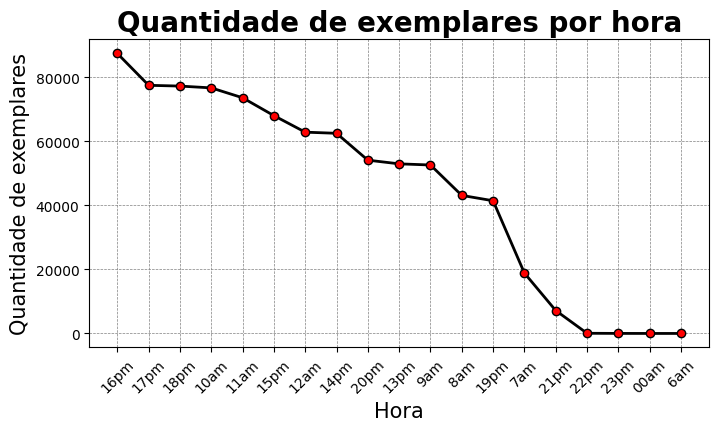

In [59]:
fig = plt.figure(figsize=(8, 4))
plt.plot(quantidade_por_hora_df, color = 'k', linewidth = 2, marker = 'o', markersize = 6, markerfacecolor = 'r')
plt.title('Quantidade de exemplares por hora', fontsize = 20, fontweight = 'bold')
plt.xlabel('Hora', fontsize = 15)
plt.ylabel('Quantidade de exemplares', fontsize = 15)
plt.xticks(ticks = labels, rotation = 45)
plt.grid(True, linestyle = '--', linewidth = 0.5, color = 'gray')
plt.show()

### **Q6**. Plotar um gráfico de barras e analise quais seriam os melhores horários para alocar as demais atividades que não sejam de atendimento ao usuário. Verifique a quantidade de empréstimos pelos números de ID. Investigue pela relação deles com o ID dos exemplares.

In [60]:
quantidade_emprestimos = df.iloc[:, [0, 3, 7]]

In [61]:
quantidade_emprestimos.data_emprestimo = quantidade_emprestimos.data_emprestimo.dt.hour

/tmp/ipykernel_992/1322132066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantidade_emprestimos.data_emprestimo = quantidade_emprestimos.data_emprestimo.dt.hour


In [62]:
quantidade_emprestimos_df = quantidade_emprestimos.value_counts().groupby('data_emprestimo').sum('id_emprestimo').to_frame('quantidade')

In [63]:
quantidade_emprestimos_df.reset_index(inplace=True)

In [66]:
quantidade_emprestimos_df

,data_emprestimo,quantidade
0,0,2
1,6,1
2,7,7160
3,8,43090
4,9,52940
5,10,76648
6,11,73565
7,12,62828
8,13,52578
9,14,62473


In [64]:
ticks = []
for i in quantidade_emprestimos_df.data_emprestimo:
    ticks.append(i)

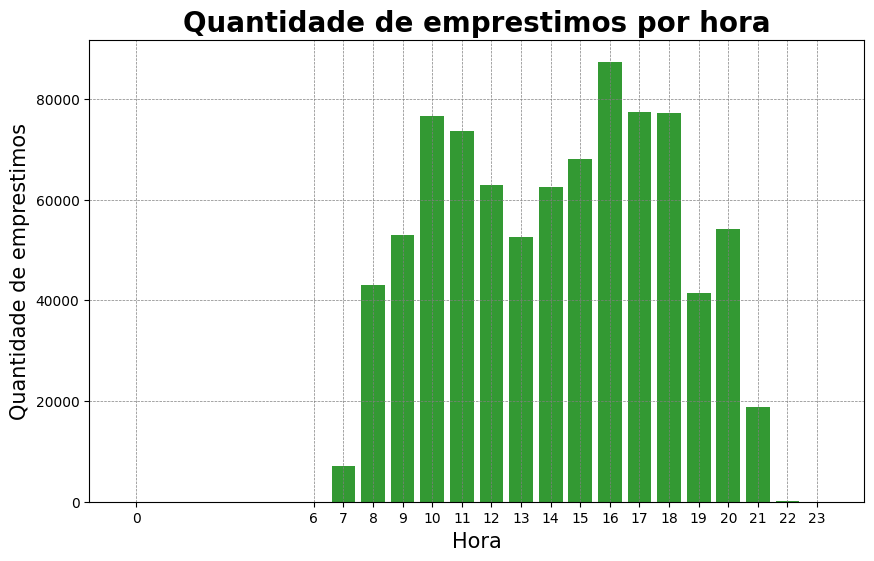

In [65]:
fig = plt.figure(figsize=(10, 6))
plt.bar(quantidade_emprestimos_df.data_emprestimo, quantidade_emprestimos_df.quantidade, color = 'green', alpha = 0.8)
plt.title('Quantidade de emprestimos por hora', fontsize = 20, fontweight = 'bold')
plt.xlabel('Hora', fontsize = 15)
plt.ylabel('Quantidade de emprestimos', fontsize = 15)
plt.xticks(ticks)
plt.grid(True, linestyle = '--', linewidth = 0.5, color = 'gray')
plt.show()

#### Salvando df final

In [ ]:
df.to_csv('/home/gondor/DevEnvironment/Python/AluraCursos/SevenDaysOfCode/ProjetoEmprestimoBiblioteca/Datasets/df_final.csv', index=False)